<a href="https://colab.research.google.com/github/elderorange247/coding_school/blob/main/DSRPproject%5BTamera_Thompson%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Necessary Libraries:


In [46]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

Load in the Data:

In [47]:
# This command is used to mount Google Drive for easy access to files and resources.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# This is a mount point (you can choose a different one if you want), but/content/drive is the conventional and recommended location.
# This command will display the files and folders in your Google Drive's root directory (MyDrive). !ls directly executes shell commands
# in the notebook. !ls executes the shell commands directly, as if you were running it in a terminal.
!ls /content/drive/MyDrive

'Colab Notebooks'
'DSRP Project'
'Thompson Presentation for DSRP Reasearch.gslides'
'Welcome to 2025 Scientific Enrichment Month by Herbert Irving Comprehensive Cancer Center at Columbia University Irving Medical Center.eml'


In [49]:
# This will import data from the url into a DataFrame.
Matriculants_MD_Granting_Medical_Schools = '/content/drive/MyDrive/DSRP Project/2024_FACTS_Table_A-4.xlsx'
# The pd.read_excel() function in a Colab notebook is used to read Excel files and load their data into a Pandas DataFrame.
# This allows you to manipulate, analyze, and visualize the data efficiently within your Python environment.
matriculants_df = pd.read_excel(Matriculants_MD_Granting_Medical_Schools)

In [50]:
# This will import data from the url into a DataFrame.
Applicants_by_State_of_Legal_Residence = '/content/drive/MyDrive/DSRP Project/2024_FACTS_Table_A-3.xlsx'
# The pd.read_excel() function in a Colab notebook is used to read Excel files and load their data into a Pandas DataFrame.
# This allows you to manipulate, analyze, and visualize the data efficiently within your Python environment.
applicants_df = pd.read_excel(Applicants_by_State_of_Legal_Residence)

In [51]:
# The .head() method is used with pandas DataFrames to display the first few rows of the dataset.
# By default, it shows the top 5 rows, but you can specify the number of rows you want to see by
# passing an integer as an argument (.head(10) for the first 10 rows).
matriculants_df.head()

,"Table A-4: Matriculants to U.S. MD-Granting Medical Schools by State of Legal Residence, Academic Years 2015-2016 through 2024-2025",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,<facts_year>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The table below displays the numbers of matric...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Matriculants by State of Legal Residence,NaN,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023,2023-2024,2024-2025,% Change from 2023-2024 to 2024-2025


In [52]:
# The .head() method is used with pandas DataFrames to display the first few rows of the dataset.
# By default, it shows the top 5 rows, but you can specify the number of rows you want to see by
# passing an integer as an argument (.head(10) for the first 10 rows).
applicants_df.head()

,"Table A-3: Applicants to U.S. MD-Granting Medical Schools by State of Legal Residence, Academic Years 2015-2016 through 2024-2025",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,<facts_year>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The table below displays the numbers of applic...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Applicants by State of Legal Residence,NaN,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023,2023-2024,2024-2025,% Change from 2023-2024 to 2024-2025


In [53]:
# The pd.read_excel() function in a Colab notebook is used to read Excel files and load their data into a Pandas DataFrame.
# This allows you to manipulate, analyze, and visualize the data efficiently within your Python environment. The skiprows
# parameter is used in functions like read_csv() (or read_excel in this case) to skip the specified number of rows at the
# beginning of the dataset. This allows you to focus on the data below the specified row without including any unnecessary data.
applicants_df = pd.read_excel(Applicants_by_State_of_Legal_Residence, skiprows = 5)
# The .dropna() method is used to romove missing values from a DataFrame. This method is commonly used during data cleaning to
# eliminate incomplete data before analysis. The .dropna(how = 'all') method in Pandas is used to remove rows (or columns) from
# a DataFrame where all the values are missing (NaN). how = 'all': This specifies that the row (or column) will only be dropped
# if every single value in it is NaN. By default, .dropna() operates on rows (axis = 0). If you want to apply it to columns,
# you can set axis = 1.
applicants_df = applicants_df.dropna(how = 'all').dropna(axis = 1, how = 'all')
# This method is used to rename a specific column in a DataFrame. applicants_df.columns[0] accesses the first column name of the
# DataFrame applicants_df. Column names are stored in the columns attribute as an index-like object. (columns = {...}). The columns
# parameter of the .rename() method takes a dictionary where keys represent the current column names, and values represent the new
# names you want to assign to those columns. 'State' is the new name assigned to the first column of the DataFrame.
applicants_df = applicants_df.rename(columns = {applicants_df.columns[0]: 'State'})
# The .head() method is used with pandas DataFrames to display the first few rows of the dataset.
# By default, it shows the top 5 rows, but you can specify the number of rows you want to see by
# passing an integer as an argument (.head(10) for the first 10 rows).
applicants_df.head()

,State,Unnamed: 1,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023,2023-2024,2024-2025,% Change from 2023-2024 to 2024-2025
0,Region,State of Legal Residence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Northeast,Connecticut,570.0,592.0,589.0,533.0,615.0,574.0,710.0,540.0,542.0,527.0,-0.028
2,NaN,Delaware,101.0,109.0,108.0,100.0,101.0,115.0,123.0,117.0,105.0,110.0,0.048
3,NaN,District of Columbia,95.0,86.0,116.0,105.0,103.0,118.0,122.0,96.0,96.0,102.0,0.063
4,NaN,Maine,125.0,129.0,115.0,119.0,99.0,103.0,101.0,107.0,75.0,81.0,0.080


In [54]:
# The pd.read_excel() function in a Colab notebook is used to read Excel files and load their data into a Pandas DataFrame.
# This allows you to manipulate, analyze, and visualize the data efficiently within your Python environment. The skiprows
# parameter is used in functions like read_csv() (or read_excel in this case) to skip the specified number of rows at the
# beginning of the dataset. This allows you to focus on the data below the specified row without including any unnecessary data.
matriculants_df = pd.read_excel(Matriculants_MD_Granting_Medical_Schools, skiprows = 5)
# The .dropna() method is used to romove missing values from a DataFrame. This method is commonly used during data cleaning to
# eliminate incomplete data before analysis. The .dropna(how = 'all') method in Pandas is used to remove rows (or columns) from
# a DataFrame where all the values are missing (NaN). how = 'all': This specifies that the row (or column) will only be dropped
# if every single value in it is NaN. By default, .dropna() operates on rows (axis = 0). If you want to apply it to columns,
# you can set axis = 1.
matriculants_df = matriculants_df.dropna(how = 'all').dropna(axis = 1, how = 'all')
# This method is used to rename a specific column in a DataFrame. applicants_df.columns[0] accesses the first column name of the
# DataFrame applicants_df. Column names are stored in the columns attribute as an index-like object. (columns = {...}). The columns
# parameter of the .rename() method takes a dictionary where keys represent the current column names, and values represent the new
# names you want to assign to those columns. 'State' is the new name assigned to the first column of the DataFrame.
matriculants_df = matriculants_df.rename(columns = {matriculants_df.columns[0]: 'State'})
# The .head() method is used with pandas DataFrames to display the first few rows of the dataset.
# By default, it shows the top 5 rows, but you can specify the number of rows you want to see by
# passing an integer as an argument (.head(10) for the first 10 rows).
matriculants_df.head()

,State,Unnamed: 1,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023,2023-2024,2024-2025,% Change from 2023-2024 to 2024-2025
0,Region,State of Legal Residence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Northeast,Connecticut,258.0,281.0,293.0,245.0,282.0,297.0,291.0,251.0,250.0,255.0,0.020
2,NaN,Delaware,39.0,49.0,49.0,44.0,38.0,56.0,48.0,52.0,44.0,46.0,0.045
3,NaN,District of Columbia,45.0,41.0,51.0,54.0,47.0,65.0,50.0,43.0,51.0,47.0,-0.078
4,NaN,Maine,46.0,53.0,40.0,46.0,41.0,46.0,35.0,43.0,34.0,31.0,-0.088


In [55]:
# The .melt() function in Pandas, which you can use in Google Colab notebooks, is a powerful tool for reshaping data. It
# transforms a DataFrame from a wide format to a long format. Here's what it does: Identifier Variables: Keeps one or more
# columns as fixed identifiers (e.g., categories, labels). Unpivots Other Columns: Converts all other columns into two new
# columns: variable: Contains the column names. value: Contains the corresponding data values. This is especially useful
# for preparing data for visualization or analysis where a long format is required. This function is available in any Python
# environment, including Google Colab, as long as you have Pandas installed.
applicants_df = applicants_df.melt(id_vars = ['State'], var_name = 'Year', value_name = 'Applicants')
# The .dropna() method is used to romove missing values from a DataFrame. This method is commonly used during data cleaning to
# eliminate incomplete data before analysis. The .dropna(subset = ['State', 'Year']) method in Pandas is used to remove rows
# from a DataFrame where the values in the specified columns ('State' and 'Year' in this case) are missing (NaN or None).
# subset = ['State', 'Year'] specifies the columns to check for missing values. dropna() drops rows where at least one of the
# specified columns has a missing value. If a row has a NaN or None in either the 'State' or 'Year' column, that row will be
# removed from the DataFrame. Other columns in the DataFrame are not checked unless explicitly included in the subset. Rows
# with missing values in either 'State' or 'Year' are removed. This is particularly useful in data cleaning to ensure critical
# columns have no missing data before analysis.
applicants_df = applicants_df.dropna(subset = ['State', 'Year'])
# The .head() method is used with pandas DataFrames to display the first few rows of the dataset.
# By default, it shows the top 5 rows, but you can specify the number of rows you want to see by
# passing an integer as an argument (.head(10) for the first 10 rows).
applicants_df.head()

,State,Year,Applicants
0,Region,Unnamed: 1,State of Legal Residence
1,Northeast,Unnamed: 1,Connecticut
14,Central,Unnamed: 1,Illinois
27,South,Unnamed: 1,Alabama
43,West,Unnamed: 1,Alaska


In [56]:
# The .melt() function in Pandas, which you can use in Google Colab notebooks, is a powerful tool for reshaping data. It
# transforms a DataFrame from a wide format to a long format. Here's what it does: Identifier Variables: Keeps one or more
# columns as fixed identifiers (e.g., categories, labels). Unpivots Other Columns: Converts all other columns into two new
# columns: variable: Contains the column names. value: Contains the corresponding data values. This is especially useful
# for preparing data for visualization or analysis where a long format is required. This function is available in any Python
# environment, including Google Colab, as long as you have Pandas installed.
matriculants_df = matriculants_df.melt(id_vars = ['State'], var_name = 'Year', value_name = 'Matriculants')
# The .dropna() method is used to romove missing values from a DataFrame. This method is commonly used during data cleaning to
# eliminate incomplete data before analysis. The .dropna(subset = ['State', 'Year']) method in Pandas is used to remove rows
# from a DataFrame where the values in the specified columns ('State' and 'Year' in this case) are missing (NaN or None).
# subset = ['State', 'Year'] specifies the columns to check for missing values. dropna() drops rows where at least one of the
# specified columns has a missing value. If a row has a NaN or None in either the 'State' or 'Year' column, that row will be
# removed from the DataFrame. Other columns in the DataFrame are not checked unless explicitly included in the subset. Rows
# with missing values in either 'State' or 'Year' are removed. This is particularly useful in data cleaning to ensure critical
# columns have no missing data before analysis.
matriculants_df = matriculants_df.dropna(subset = ['State', 'Year'])
# The .head() method is used with pandas DataFrames to display the first few rows of the dataset.
# By default, it shows the top 5 rows, but you can specify the number of rows you want to see by
# passing an integer as an argument (.head(10) for the first 10 rows).
matriculants_df.head()

,State,Year,Matriculants
0,Region,Unnamed: 1,State of Legal Residence
1,Northeast,Unnamed: 1,Connecticut
14,Central,Unnamed: 1,Illinois
27,South,Unnamed: 1,Alabama
43,West,Unnamed: 1,Alaska


In [57]:

merged_df = pd.merge(applicants_df, matriculants_df, on = ['State', 'Year'], how = 'inner')

merged_df.dropna(subset = ['Applicants', 'Matriculants'], inplace = True)


merged_df['Applicants'] = pd.to_numeric(merged_df['Applicants'], errors = 'coerce')

merged_df['Matriculants'] = pd.to_numeric(merged_df['Matriculants'], errors = 'coerce')

In [58]:

merged_df = merged_df.dropna(subset = ['Applicants', 'Matriculants'])

merged_df.head()

,State,Year,Applicants,Matriculants
10,Northeast,2015-2016,570.0,258.0
11,Central,2015-2016,2294.0,897.0
12,South,2015-2016,548.0,262.0
13,West,2015-2016,109.0,43.0
14,U.S. Territories and Possessions,2015-2016,14.0,5.0


# Research Question: Is there a strong correlation between the number of applicants and matriculants at U.S. MD - granting medical schools from 2010 - 2024?

# Exploratory Data Analysis

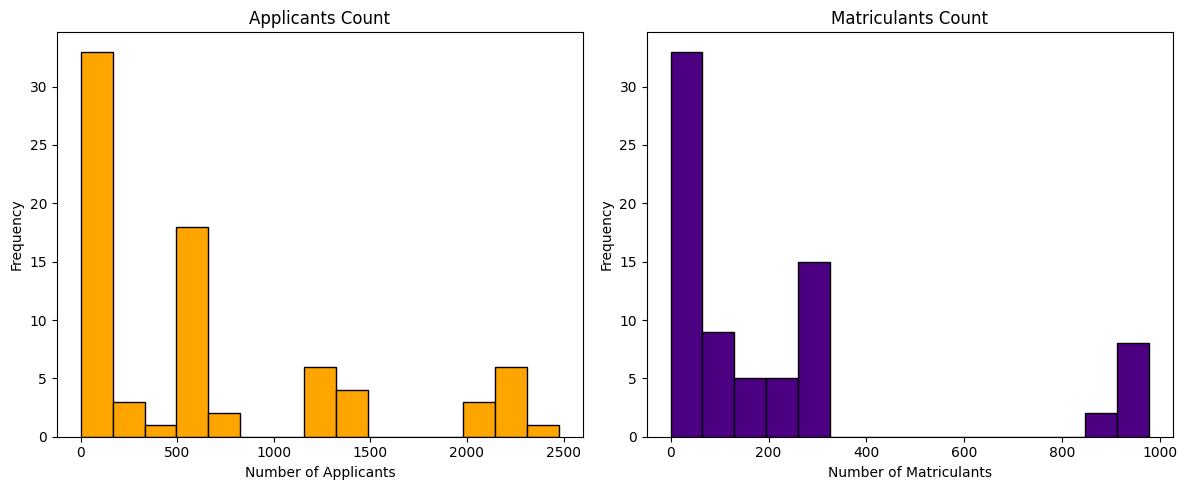

In [59]:

plt.figure(figsize = (12, 5))

# Applicants

plt.subplot(1, 2, 1)

plt.hist(merged_df['Applicants'], bins = 15, color = 'orange', edgecolor = 'black')

plt.title('Applicants Count')

plt.xlabel('Number of Applicants')

plt.ylabel('Frequency')

# Matriculants

plt.subplot(1, 2, 2)

plt.hist(merged_df['Matriculants'], bins = 15, color = 'indigo', edgecolor = 'black')

plt.title('Matriculants Count')

plt.xlabel('Number of Matriculants')

plt.ylabel('Frequency')

plt.tight_layout()

plt.show()

/tmp/ipython-input-612701216.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([merged_df['Applicants'], merged_df['Matriculants']], labels = ['Applicants', 'Matriculants'])


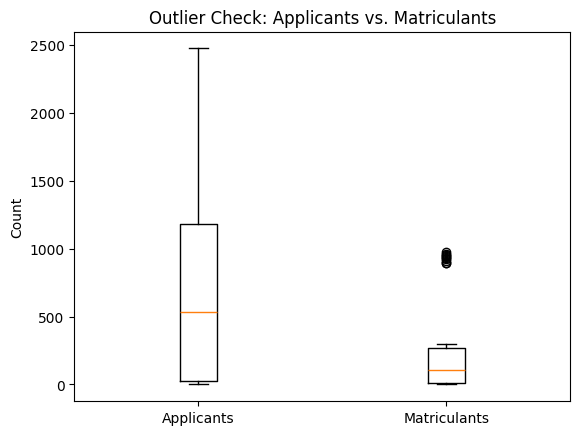

In [60]:

plt.boxplot([merged_df['Applicants'], merged_df['Matriculants']], labels = ['Applicants', 'Matriculants'])

plt.title('Outlier Check: Applicants vs. Matriculants')

plt.ylabel('Count')

plt.show()

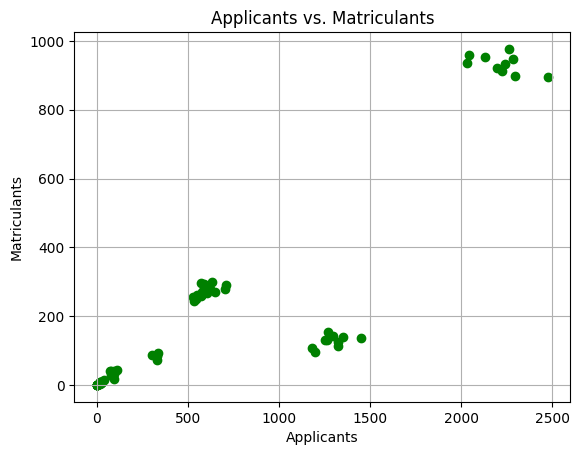

In [61]:

plt.scatter(merged_df['Applicants'], merged_df['Matriculants'], color = 'green')

plt.title('Applicants vs. Matriculants')

plt.xlabel('Applicants')

plt.ylabel('Matriculants')

plt.grid(True)

plt.show()

In [62]:

correlation = merged_df['Applicants'].corr(merged_df['Matriculants'])

print(f"Correlation between Applicants and Matriculants: {correlation:.2f}")

Correlation between Applicants and Matriculants: 0.89


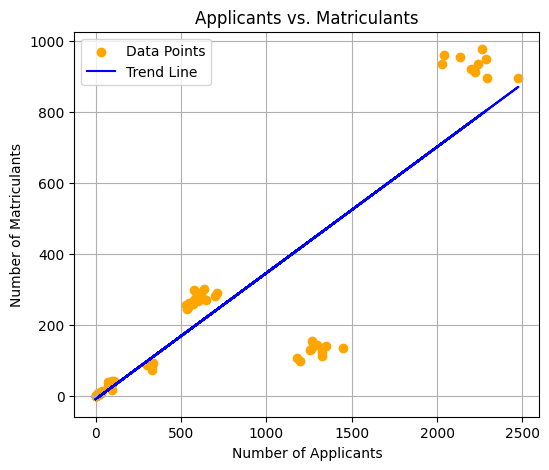

In [63]:

plt.figure(figsize = (6, 5))

plt.scatter(merged_df['Applicants'], merged_df['Matriculants'], color =  'orange', label = 'Data Points')

# Adding trend line (Linear Regression)

m, b = np.polyfit(merged_df['Applicants'], merged_df['Matriculants'], 1)

plt.plot(merged_df['Applicants'], m * merged_df['Applicants'] + b, color = 'blue', label = 'Trend Line')


plt.title("Applicants vs. Matriculants")

plt.xlabel("Number of Applicants")

plt.ylabel("Number of Matriculants")

plt.legend()

plt.grid(True)

plt.show()

# Statistical Analysis

In [64]:
# Linear regression hypothesis testing

slope, intercept, r_value, p_value, std_err = linregress(merged_df['Applicants'], merged_df['Matriculants'])


print("Hypothesis Test (Linear Regression)")

print(f"Slope: {slope:.2f}")

print(f"Correlation Coefficient (r): {r_value:.2f}")

print(f"P-value: {p_value:.4f}")


if p_value < 0.05:

  print("Statistically significant relationship (Reject H₀).")

else:

  print("No significant relationship found (Fail to reject H₀).")

Hypothesis Test (Linear Regression)
Slope: 0.36
Correlation Coefficient (r): 0.89
P-value: 0.0000
Statistically significant relationship (Reject H₀).


In [65]:
# ML Model

X = merged_df[['Applicants']]

y = merged_df['Matriculants']

# Training model

model = LinearRegression()

model.fit(X, y)

# Making predictions

y_pred = model.predict(X)


mae = mean_absolute_error(y, y_pred)

r2 = r2_score(y, y_pred)


print("Machine Learning Model: Linear Regression")

print(f"Intercept: {model.intercept_:.2f}")

print(f"Model Slope: {model.coef_[0]:.2f}")

print(f"Mean Absolute Error (MAE): {mae:.2f}")

print(f"R² Score: {r2:.2f}")

Machine Learning Model: Linear Regression
Intercept: -9.71
Model Slope: 0.36
Mean Absolute Error (MAE): 86.04
R² Score: 0.79


Final Conclusion (Answer):
Yes, there is a strong and statistically significant correlation between the number of applicants and matriculants.

Supporting Evidence:
Correlation Coefficient (r): 0.89. This indicates a very strong positive linear relationship between applicants and matriculants.

P-value: 0.0000. Since p < 0.05, the result is statistically significant. You reject the null hypothesis (H₀), meaning there is indeed a correlation.

Linear Regression Slope: 0.36. On average, for every 100 new applicants, around 36 students are matriculating.

R² Score: 0.79. About 79% of the variation in matriculants is explained by the number of applicants. This is a high level of explanatory power for a simple model.

Mean Absolute Error (MAE): 86.04. This is a reasonably small error in the context of the scale of your data.

Visual Confirmation: Your scatter plots and trend lines show a strong, upward-sloping relationship. Boxplots confirmed there are a few outliers, but overall the pattern holds. The histograms showed a similar skew and concentration in both applicants and matriculants, reinforcing the relationship.

Interpretation: This means medical schools with more applicants tend to admit more students — but not in a 1:1 ratio. The competitiveness of the process still varies, but overall, applicant volume is a strong predictor of matriculant volume.

Conclusion Summary: This study explored the relationship between the number of applicants and matriculants at U.S. MD-granting medical schools from 2010 to 2024. Through visual analysis and statistical modeling, we found a strong positive correlation (r = 0.89) between the number of applicants and the number of matriculants. A linear regression model confirmed this relationship, with a statistically significant p-value (< 0.0001) and an R² score of 0.79, indicating that applicant volume accounts for a large proportion of the variation in matriculant numbers. While the admission process remains highly competitive, these findings suggest that institutions with higher applicant pools tend to admit more students—though not at the same rate. This supports the idea that applicant volume is a key predictor of matriculant volume, offering valuable insight into medical school admissions trends over time.